In [8]:
import os
import pandas as pd
import glob
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.concat(map(pd.read_csv, glob.glob('test/*.csv')))

In [5]:
df

,phase,id,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14
0,0,2,4167.692383,4175.897461,4151.281738,4171.794922,4136.922852,4169.743652,4169.743652,4184.102539,4184.102539,4187.692383,4223.076660,4764.615234,4176.410156,4175.897461
1,0,2,4174.871582,4171.281738,4160.000000,4174.358887,4143.589844,4170.769043,4170.256348,4180.000000,4180.512695,4187.692383,4223.589844,4770.769043,4175.384277,4182.563965
2,0,2,4173.333008,4169.230469,4125.641113,4168.205078,4087.692139,4169.230469,4170.769043,4164.102539,4170.256348,4155.897461,4206.153809,4745.127930,4165.127930,4173.846191
3,0,2,4167.179199,4169.743652,4171.281738,4174.871582,4175.897461,4169.230469,4169.230469,4190.769043,4193.846191,4206.153809,4232.307617,4777.948730,4182.563965,4176.922852
4,0,2,4174.871582,4171.281738,4148.205078,4172.820313,4117.436035,4168.205078,4169.743652,4169.743652,4172.307617,4169.230469,4210.256348,4759.487305,4170.256348,4182.563965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589179,2,3,4145.127930,3827.179443,4082.563965,4123.076660,4175.384277,4155.384277,4230.769043,4168.205078,4185.641113,4332.820313,3803.076904,4120.000000,3007.692139,4122.563965
589180,2,3,4152.820313,3787.692139,4089.743408,4121.025391,4171.794922,4161.025391,4220.512695,4170.769043,4174.358887,4304.615234,3799.487061,4129.743652,2983.589600,4125.641113
589181,2,3,4156.410156,3756.923096,4101.538574,4108.717773,4152.307617,4164.615234,4208.717773,4168.205078,4176.922852,4313.333008,3791.794678,4138.461426,2967.692139,4132.820313
589182,2,3,4166.153809,3731.281982,4116.922852,4083.589600,4087.179443,4163.076660,4192.307617,4171.281738,4165.127930,4303.076660,3768.205078,4146.666504,2941.538330,4140.512695


In [6]:
df.isnull().sum()

phase    0
id       0
ch1      0
ch2      0
ch3      0
ch4      0
ch5      0
ch6      0
ch7      0
ch8      0
ch9      0
ch10     0
ch11     0
ch12     0
ch13     0
ch14     0
dtype: int64

In [7]:
df =df.drop(['id'], axis=1)
df

,phase,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14
0,0,4167.692383,4175.897461,4151.281738,4171.794922,4136.922852,4169.743652,4169.743652,4184.102539,4184.102539,4187.692383,4223.076660,4764.615234,4176.410156,4175.897461
1,0,4174.871582,4171.281738,4160.000000,4174.358887,4143.589844,4170.769043,4170.256348,4180.000000,4180.512695,4187.692383,4223.589844,4770.769043,4175.384277,4182.563965
2,0,4173.333008,4169.230469,4125.641113,4168.205078,4087.692139,4169.230469,4170.769043,4164.102539,4170.256348,4155.897461,4206.153809,4745.127930,4165.127930,4173.846191
3,0,4167.179199,4169.743652,4171.281738,4174.871582,4175.897461,4169.230469,4169.230469,4190.769043,4193.846191,4206.153809,4232.307617,4777.948730,4182.563965,4176.922852
4,0,4174.871582,4171.281738,4148.205078,4172.820313,4117.436035,4168.205078,4169.743652,4169.743652,4172.307617,4169.230469,4210.256348,4759.487305,4170.256348,4182.563965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589179,2,4145.127930,3827.179443,4082.563965,4123.076660,4175.384277,4155.384277,4230.769043,4168.205078,4185.641113,4332.820313,3803.076904,4120.000000,3007.692139,4122.563965
589180,2,4152.820313,3787.692139,4089.743408,4121.025391,4171.794922,4161.025391,4220.512695,4170.769043,4174.358887,4304.615234,3799.487061,4129.743652,2983.589600,4125.641113
589181,2,4156.410156,3756.923096,4101.538574,4108.717773,4152.307617,4164.615234,4208.717773,4168.205078,4176.922852,4313.333008,3791.794678,4138.461426,2967.692139,4132.820313
589182,2,4166.153809,3731.281982,4116.922852,4083.589600,4087.179443,4163.076660,4192.307617,4171.281738,4165.127930,4303.076660,3768.205078,4146.666504,2941.538330,4140.512695


In [9]:
columns = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5','ch6','ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch4']
ss = preprocessing.StandardScaler()
df[columns] = ss.fit_transform(df[columns])

In [10]:
df

,phase,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14
0,0,-0.062814,0.017509,-0.316124,-0.016933,-0.042311,-0.131041,-0.028584,0.526661,0.122719,0.035588,0.258430,1.563625,0.011521,4175.897461
1,0,0.011109,0.006217,-0.196325,0.002340,-0.023808,-0.097442,-0.021529,0.299790,0.061699,0.035588,0.261734,1.582329,0.006312,4182.563965
2,0,-0.004734,0.001199,-0.668458,-0.043917,-0.178943,-0.147857,-0.014474,-0.579345,-0.112638,-0.069489,0.149494,1.504396,-0.045760,4173.846191
3,0,-0.068098,0.002454,-0.041300,0.006194,0.065856,-0.147857,-0.035645,0.895321,0.288342,0.096599,0.317852,1.604151,0.042764,4176.922852
4,0,0.011109,0.006217,-0.358402,-0.009225,-0.096394,-0.181455,-0.028584,-0.267390,-0.077770,-0.025425,0.175903,1.548040,-0.019723,4182.563965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589179,2,-0.295154,-0.835605,-1.260390,-0.383137,0.064432,-0.601551,0.811128,-0.352473,0.148872,0.515209,-2.445205,-0.395591,-5.922140,4122.563965
589180,2,-0.215948,-0.932208,-1.161736,-0.398556,0.054471,-0.416710,0.670000,-0.210685,-0.042903,0.421997,-2.468314,-0.365976,-6.044511,4125.641113
589181,2,-0.178984,-1.007482,-0.999656,-0.491069,0.000387,-0.299083,0.507702,-0.352473,0.000679,0.450807,-2.517832,-0.339480,-6.125223,4132.820313
589182,2,-0.078656,-1.070211,-0.788257,-0.679952,-0.180366,-0.349497,0.281897,-0.182333,-0.199810,0.416912,-2.669683,-0.314542,-6.258008,4140.512695


              precision    recall  f1-score   support

           0       0.90      0.85      0.87     81154
           1       0.80      0.80      0.80     83537
           2       0.85      0.90      0.87     83271

    accuracy                           0.85    247962
   macro avg       0.85      0.85      0.85    247962
weighted avg       0.85      0.85      0.85    247962



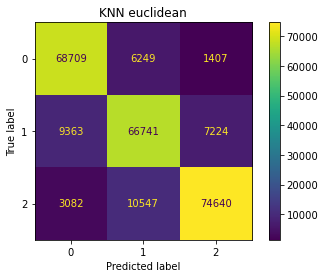

In [11]:
x=df.drop(['phase'], axis=1)
y=df['phase']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 ,stratify=y)
#x_train, x_test, y_train, y_test = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
print(classification_report(y_pred, y_test))
plt.title("KNN euclidean")
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     77760
           1       0.81      0.80      0.81     84347
           2       0.86      0.89      0.87     85855

    accuracy                           0.85    247962
   macro avg       0.85      0.85      0.85    247962
weighted avg       0.85      0.85      0.85    247962



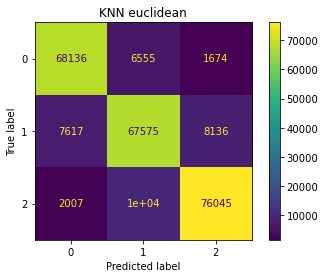

In [12]:
model1=KNeighborsClassifier(n_neighbors=1)

model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
plot_confusion_matrix(model1, x_test, y_test)
print(classification_report(y_pred1, y_test))
plt.title("KNN euclidean")
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     76391
           1       0.84      0.84      0.84     83400
           2       0.90      0.90      0.90     88171

    accuracy                           0.88    247962
   macro avg       0.88      0.88      0.88    247962
weighted avg       0.88      0.88      0.88    247962



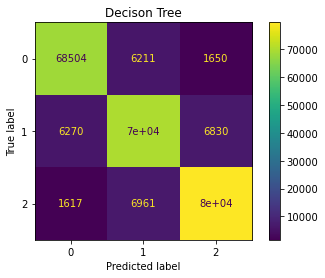

In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_pred, y_test))
plot_confusion_matrix(dt, x_test, y_test)
plt.title("Decison Tree")
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     77528
           1       0.67      0.78      0.72     72344
           2       0.88      0.79      0.83     98090

    accuracy                           0.80    247962
   macro avg       0.80      0.80      0.80    247962
weighted avg       0.81      0.80      0.80    247962



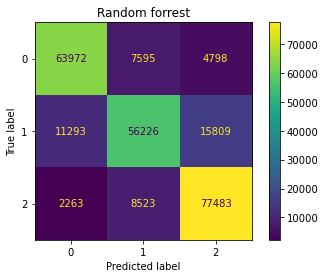

In [18]:
rf = RandomForestClassifier(max_depth=10, random_state=42)

rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

print(classification_report(y_pred2, y_test))

plot_confusion_matrix(rf, x_test, y_test)
plt.title("Random forrest")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.36      0.53    247962

    accuracy                           0.36    247962
   macro avg       0.33      0.12      0.18    247962
weighted avg       1.00      0.36      0.53    247962



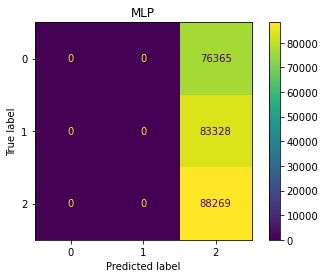

In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='logistic', solver='adam', hidden_layer_sizes=(15,15,15,15,15), max_iter=1000)
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)
print(classification_report(y_pred_mlp, y_test))
plot_confusion_matrix(mlp, x_test, y_test)
plt.title("MLP")
plt.show()

In [36]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import seaborn as sns

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: SystemError: <built-in method __contains__ of dict object at 0x0000017D88E72E00> returned a result with an error set

In [35]:

CNN_Model = Sequential()

CNN_Model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (x_train.shape[1],1)))
CNN_Model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
CNN_Model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

CNN_Model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
CNN_Model.add(Dropout(0.5))

CNN_Model.add(Flatten())

CNN_Model.add(Dense(units = 512, activation='relu'))
CNN_Model.add(Dense(units = 1024, activation='relu'))
CNN_Model.add(Dense(units = 6, activation='softmax'))

CNN_Model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Epochs = CNN_Model.fit(x_train, y_train, epochs = 10)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: SystemError: <built-in method __contains__ of dict object at 0x0000017D88E72EC0> returned a result with an error set